In [1]:
#라이브러리와 데이터 불러오기
import pandas as pd
df = pd.read_csv("manhattan.csv")

In [2]:
#데이터 형태 확인
df.head(10)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
5,10817,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,Manhattan
6,9077,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,Midtown East,Manhattan
7,5150,2995,0.0,1,579,6,21.0,33,0,0,0,0,0,0,0,0,Battery Park City,Manhattan
8,9507,15000,2.0,2,1715,0,30.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
9,1437,4650,1.0,1,915,5,5.0,106,0,0,0,0,0,0,0,0,Upper East Side,Manhattan


In [3]:
#데이터를 8:2비율로 나누기
from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y= df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [4]:
#모델생성하기
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [5]:
#원하는 값 만들어서 모델에 넣어보기
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = mlr.predict(my_apartment)

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
my_predict

array([[2468.25785202]])

In [6]:
#예측값구하기
y_predict = mlr.predict(x_test)

In [15]:
y_predict = pd.DataFrame(y_predict)

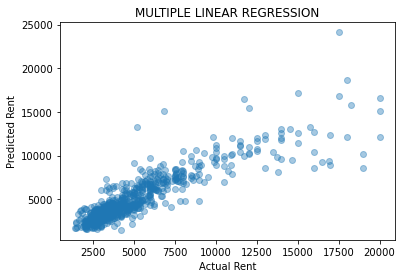

In [7]:
#x축은 실제 임대료, y축은 예측한 임대료로 산점도 찍어보기, 맞췄다면 선형태로 일치되어 나옴
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## 회귀계수와 상수(절편)확인하기
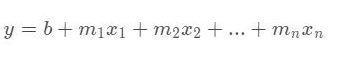

In [8]:
#14개의 회귀계수확인(변수의 갯수와 동일)
print(mlr.coef_)

[[-317.26343942 1099.8448032     4.99327979  -16.07169032   23.85321823
    -6.85028879 -100.79921763   32.07764192  125.54842885 -197.86694334
   130.64205305  -11.54403419  -77.49269494    1.25834568]]


## 상관관계 살펴보기
- 주택면적과는 일정한 형태를 보이지만, 얼마나 오래지어졌는가의 변수와는 형태가 보이지않으므로 상관관계가 없는 것을 볼 수 있다.

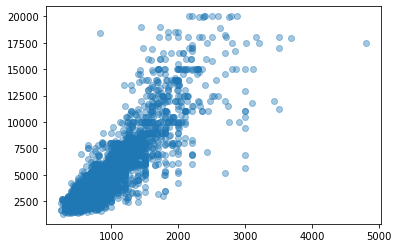

In [9]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

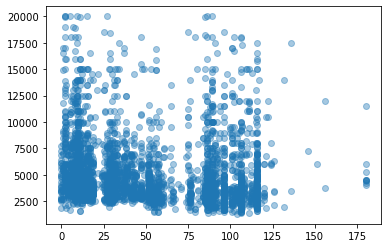

In [10]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

## 모델정확도 평가하기
- 다중선형회귀 모델의 정확도를 평가할 때는 잔차 분석(Analysis)을 하면 된다. 잔차는 실제 값 y와 예측된 값 ŷ의 차 e를 말한다. 방정식으로 표현하면 이렇게.

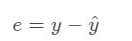

- sklearn의 linear_model.LinearRegression를 사용해서 모델을 생성하면 .score()라는 메서드를 사용할 수 있는데 R²라고 하는 결정계수(coefficient of determination)를 돌려준다.
- 결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명
- RSS(residual sum of square)는 직선이 미처 Y에 대해 설명하지 못한 변화량을 의미
- TSS(total sum of squares), y값의 총 변화량으로 이해

In [16]:
#RSS
((y - y_predict) ** 2).sum()

rent    0.0
0       0.0
dtype: float64

In [13]:
#TSS
((y - y.mean()) ** 2).sum()

rent    3.539224e+10
dtype: float64

In [12]:
#14개의 변수를 넣고 생성한 모델의 결정계수
print(mlr.score(x_train, y_train))

0.7783263912762879
